In [1]:
import pandas as pd
import random

# Generate random data for 50 MBA students
sno = list(range(1, 51))  # Serial numbers from 1 to 50
percentages = [round(random.uniform(70, 95), 1) for _ in range(50)]  # Random 10th percentage between 70 and 95
salaries = [random.randint(60000, 120000) for _ in range(50)]  # Random salary between 60,000 and 1,20,000

# Create a DataFrame
data = {
    "S.No": sno,
    "10th Percentage": percentages,
    "Salary (in INR)": salaries
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('mba_students_50.csv', index=False)

print("CSV file 'mba_students_50.csv' with 50 records has been created successfully.")


CSV file 'mba_students_50.csv' with 50 records has been created successfully.


In [3]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=4, linewidth=100)
df = pd.read_csv('mba_students_50.csv')
df.head(10)

,S.No,10th Percentage,Salary (in INR)
0,1,85.8,98079
1,2,94.5,80816
2,3,73.2,95738
3,4,79.3,105024
4,5,80.1,93750
5,6,88.9,109859
6,7,87.8,86471
7,8,70.3,111792
8,9,84.0,94336
9,10,89.2,113084


In [6]:
import statsmodels.api as sm
X = sm.add_constant(df['10th Percentage'])
X.head(5)

,const,10th Percentage
0,1.0,85.8
1,1.0,94.5
2,1.0,73.2
3,1.0,79.3
4,1.0,80.1


In [9]:
Y = df['Salary (in INR)']
Y.head(5)

,Salary (in INR)
0,98079
1,80816
2,95738
3,105024
4,93750


In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,
Y,
train_size = 0.8,
random_state = 100 )


In [11]:
lm = sm.OLS( train_y, train_X ).fit()
print( lm.params )

const              115806.250343
10th Percentage      -262.260323
dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

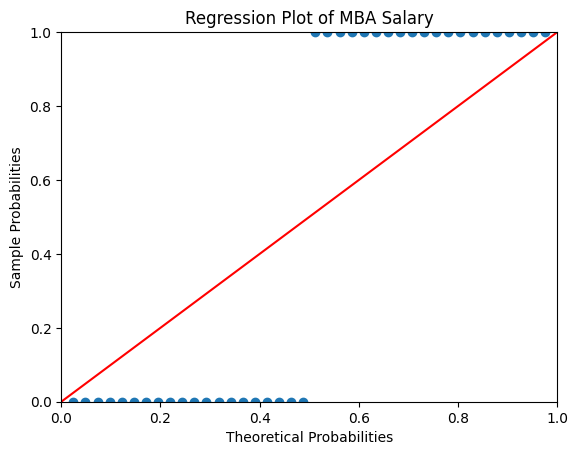

In [14]:
mba_salary_resid = lm.resid
probplot = sm.ProbPlot(mba_salary_resid)
plt.figure( figsize = (8, 6))
probplot.ppplot( line='45')
plt.title( "Regression Plot of MBA Salary")

plt.show()